"""Build a sentiment analysis / polarity model
Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.
In this examples we will use a movie review dataset.
"""

In [48]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
movie_reviews_data_folder = r'C:\Users\Administrator\nltk_data\corpora\movie_reviews'
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

n_samples: 2000


split the dataset in training and test set:

In [50]:
x_train, x_test, y_train, y_test = train_test_split(
       dataset.data, dataset.target, test_size=0.25, random_state=None)

In [51]:
dataset.target_names

['neg', 'pos']

TASK: Build a vectorizer / classifier pipeline that filters out tokens
that are too rare or too frequent

In [52]:
pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

TASK: Build a grid search to find out whether unigrams or bigrams are
more useful.
Fit the pipeline on the training set using grid search for the parameters

In [54]:
parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

TASK: print the mean and std for each candidate along with the parameter
settings for all the candidates explored by grid search.

In [36]:
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

0 params - {'vect__ngram_range': (1, 1)}; mean - 0.84; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.85; std - 0.01


TASK: Predict the outcome on the testing set and store it in a variable
named y_predicted

In [37]:
y_predicted = grid_search.predict(x_test)

In [38]:
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

        neg       0.87      0.87      0.87       269
        pos       0.85      0.85      0.85       231

avg / total       0.86      0.86      0.86       500



Print and plot the confusion matrix

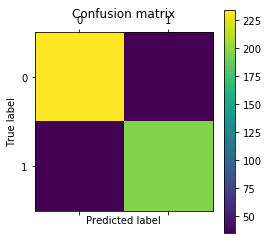

[[234  35]
 [ 35 196]]


In [47]:
cm = metrics.confusion_matrix(y_test, y_predicted)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(cm)

# Trying classifier on fake movie reviews

In [41]:
reviews_new = ['This movie was excellent', 'Absolute joy ride', 
            'Steven Seagal was terrible', 'Steven Seagal shined through.', 
              'This was certainly a movie', 'Two thumbs up', 'I fell asleep halfway through', 
              "We can't wait for the sequel!!", '!', '?', 'I cannot recommend this highly enough', 
              'instant classic.', 'Steven Seagal was amazing. His performance was Oscar-worthy.',
              'This project is the best of the year',
              'This project sucks']

In [42]:
predict = grid_search.predict(reviews_new)
for review, category in zip(reviews_new, predict):
    print('%r => %s' % (review, dataset.target_names[category]))

'This movie was excellent' => pos
'Absolute joy ride' => pos
'Steven Seagal was terrible' => neg
'Steven Seagal shined through.' => neg
'This was certainly a movie' => neg
'Two thumbs up' => neg
'I fell asleep halfway through' => neg
"We can't wait for the sequel!!" => neg
'!' => neg
'?' => neg
'I cannot recommend this highly enough' => neg
'instant classic.' => pos
'Steven Seagal was amazing. His performance was Oscar-worthy.' => neg
'This project is the best of the year' => pos
'This project sucks' => neg
